In [1]:
import pandas as pd

import lightgbm as lgb

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/kaggle/input/case-ih-time-series-data/data.csv')

In [3]:
df.head(5)

,date,work,income
0,"Thursday, September 30, 2021",2,2100
1,"Sunday, October 03, 2021",1,3600
2,"Monday, October 04, 2021",1,4000
3,"Tuesday, October 05, 2021",1,7900
4,"Wednesday, October 06, 2021",1,7500


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
data = pd.DataFrame(df.income.copy())

In [6]:
data.columns = ["y"]

In [7]:
data.head()

,y
0,2100
1,3600
2,4000
3,7900
4,7500


In [8]:
for i in range(6, 25):
    data["lag_{}".format(i)] = data.y.shift(i)

In [9]:
data.head()

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
0,2100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
x = data.dropna().drop(['y'], axis=1)

y = data.dropna().y

In [11]:
x.head()

,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
24,5600.0,6000.0,12500.0,9000.0,5600.0,10000.0,4200.0,5500.0,2600.0,8000.0,6800.0,5800.0,6700.0,10600.0,7500.0,7900.0,4000.0,3600.0,2100.0
25,2100.0,5600.0,6000.0,12500.0,9000.0,5600.0,10000.0,4200.0,5500.0,2600.0,8000.0,6800.0,5800.0,6700.0,10600.0,7500.0,7900.0,4000.0,3600.0
26,6400.0,2100.0,5600.0,6000.0,12500.0,9000.0,5600.0,10000.0,4200.0,5500.0,2600.0,8000.0,6800.0,5800.0,6700.0,10600.0,7500.0,7900.0,4000.0
27,2400.0,6400.0,2100.0,5600.0,6000.0,12500.0,9000.0,5600.0,10000.0,4200.0,5500.0,2600.0,8000.0,6800.0,5800.0,6700.0,10600.0,7500.0,7900.0
28,2000.0,2400.0,6400.0,2100.0,5600.0,6000.0,12500.0,9000.0,5600.0,10000.0,4200.0,5500.0,2600.0,8000.0,6800.0,5800.0,6700.0,10600.0,7500.0


In [12]:
tscv = TimeSeriesSplit(n_splits=5)

In [13]:
def timeseries_train_test_split(x, y, test_size):
    
    test_index = int(len(x)*(1-test_size))
    
    x_train = x.iloc[:test_index]
    y_train = y.iloc[:test_index]
    
    x_test = x.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return x_train, x_test, y_train, y_test

In [14]:
x_train, x_test, y_train, y_test = timeseries_train_test_split(x, y, test_size=0.3)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 19)
(51, 19)
(117,)
(51,)


In [16]:
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

In [17]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

In [18]:
lgbm_model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=60)

[LightGBM] [Warning] Unknown parameter: learnnig_rage
[1]	valid_0's l2: 1.19772e+07	valid_0's l1: 2843.22
Training until validation scores don't improve for 60 rounds
[2]	valid_0's l2: 1.19499e+07	valid_0's l1: 2839.01
[3]	valid_0's l2: 1.23161e+07	valid_0's l1: 2888.15
[4]	valid_0's l2: 1.22696e+07	valid_0's l1: 2892.47
[5]	valid_0's l2: 1.23666e+07	valid_0's l1: 2910.66
[6]	valid_0's l2: 1.24027e+07	valid_0's l1: 2911.49
[7]	valid_0's l2: 1.2595e+07	valid_0's l1: 2939.8
[8]	valid_0's l2: 1.2727e+07	valid_0's l1: 2964.08
[9]	valid_0's l2: 1.28256e+07	valid_0's l1: 2981.69
[10]	valid_0's l2: 1.29327e+07	valid_0's l1: 2983.51
[11]	valid_0's l2: 1.31787e+07	valid_0's l1: 3008.96
[12]	valid_0's l2: 1.33689e+07	valid_0's l1: 3036
[13]	valid_0's l2: 1.35053e+07	valid_0's l1: 3059.87
[14]	valid_0's l2: 1.36483e+07	valid_0's l1: 3085.16
[15]	valid_0's l2: 1.35919e+07	valid_0's l1: 3077.56
[16]	valid_0's l2: 1.36704e+07	valid_0's l1: 3080.47
[17]	valid_0's l2: 1.36972e+07	valid_0's l1: 3077.56

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


In [19]:
y_pred = lgbm_model.predict(x_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)

rmse = mse**(0.5)

print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 11949929.28
RMSE: 3456.87


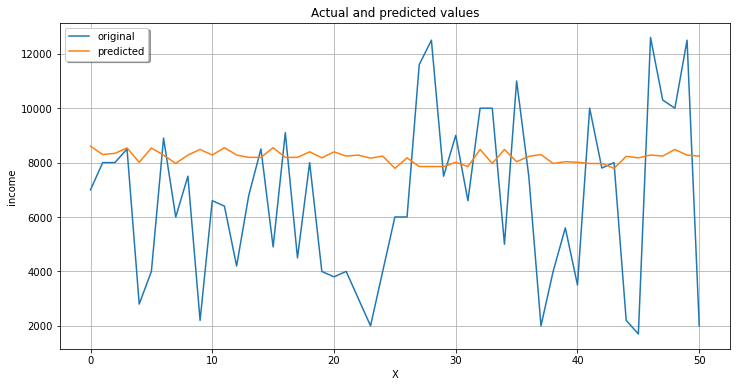

In [21]:
x_ax = range(len(y_test))

plt.figure(figsize=(12, 6))

plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")

plt.title("Actual and predicted values")
plt.xlabel('X')
plt.ylabel('income')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

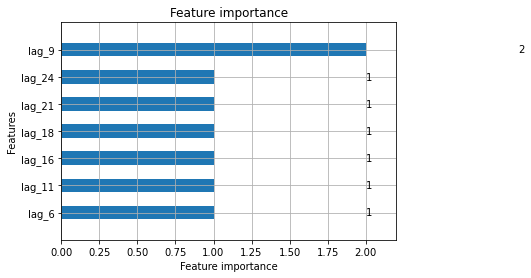

In [22]:
lgb.plot_importance(lgbm_model, height=.5) 